In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')
# 한글폰트
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
    print('Mac version')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
    print('Windows version')
elif platform.system() == 'Linux':
    path = "/usr/share/fonts/NanumFont/NanumGothicBold.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.rc('font', family=font_name)
    print('Linux version')
else:
    print('Unknown system... sorry~~~~')

Linux version


In [3]:
train = pd.read_csv('data/train.csv', parse_dates=["date_time"])

- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)
- number_of_rentals : 따릉이 대여량

- 기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.
- 2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)
- 2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)
- precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
- 원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.

In [4]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


### 데이터크기
273개의 행과과 10개의 컬럼을 가지고 있다.

In [5]:
train.shape

(273, 10)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date_time                  273 non-null    datetime64[ns]
 1   wind_direction             273 non-null    float64       
 2   sky_condition              273 non-null    float64       
 3   precipitation_form         273 non-null    float64       
 4   wind_speed                 273 non-null    float64       
 5   humidity                   273 non-null    float64       
 6   low_temp                   273 non-null    float64       
 7   high_temp                  273 non-null    float64       
 8   Precipitation_Probability  273 non-null    float64       
 9   number_of_rentals          273 non-null    int64         
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 21.5 KB


### 결측치 파악
결측치가 존재하지 않습니다.

In [7]:
train.isnull().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

### 데이터 전처리
date_time를 나누어 year(년),month(월),day(일),weekday(평일,주말)로 나누어 주자.

In [8]:
train["year"] = train["date_time"].dt.year
train["month"] = train["date_time"].dt.month
train["day"] = train["date_time"].dt.day
train["weekday"] = train["date_time"].dt.weekday
train.shape

(273, 14)

칼럼 10개에서 14개로 늘어난걸 확인 할 수 있다.

In [9]:
train.head(50)

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,weekday
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,6
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,1
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,2
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,3
5,2018-04-06,256.412,3.466,0.358,3.734,68.885,2.500,9.895,40.068,13297,2018,4,6,4
6,2018-04-07,288.858,1.912,0.000,4.824,45.541,1.938,10.947,9.122,13088,2018,4,7,5
7,2018-04-08,200.939,2.405,0.054,3.865,53.243,4.312,14.211,15.676,7758,2018,4,8,6
8,2018-04-09,165.196,2.000,0.000,2.412,55.473,8.188,17.474,10.000,23925,2018,4,9,0
9,2018-04-10,171.541,2.919,0.088,5.607,54.054,8.375,18.474,21.824,20423,2018,4,10,1


## 시각화
- 년도별 그래프를 보면 매년마다 대여량이 많아지는걸 볼 수 있다.
- 4,5,6월 그래프를 보면 날씨가 따뜻해질수록 대여량이 많아지는걸 볼 수 있다.
- 일별 그래프는 특징을 찾기 어려운거 같다.
- 요일별 그래프는 대여량이 월~토는 비슷하며 일요일은 미미하게 적은걸 확인 할 수 있다.

[Text(0.5, 0, 'weekday'), Text(0.5, 1.0, '요일별 대여량')]

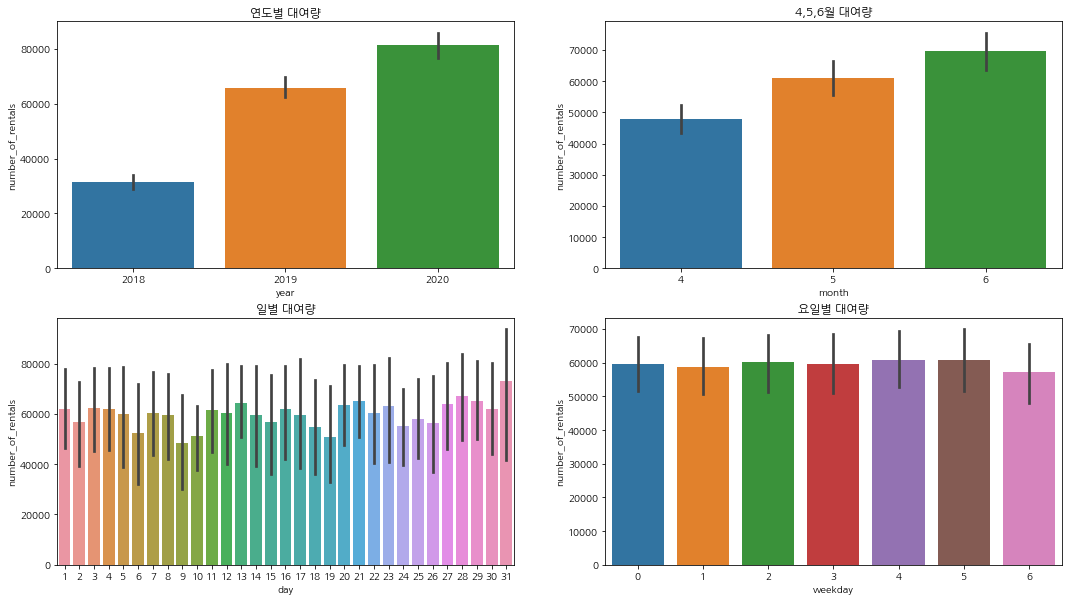

In [10]:
figure, ((ax1,ax2), (ax3,ax4)) = plt.subplots(nrows=2, ncols=2)
figure.set_size_inches(18,10)

sns.barplot(data=train, x="year", y="number_of_rentals", ax=ax1)
sns.barplot(data=train, x="month", y="number_of_rentals", ax=ax2)
sns.barplot(data=train, x="day", y="number_of_rentals", ax=ax3)
sns.barplot(data=train, x="weekday", y="number_of_rentals", ax=ax4)

ax1.set(ylabel='number_of_rentals',title="연도별 대여량")
ax2.set(xlabel='month',title="4,5,6월 대여량")
ax3.set(xlabel='day', title="일별 대여량")
ax4.set(xlabel='weekday', title="요일별 대여량")

<AxesSubplot:>

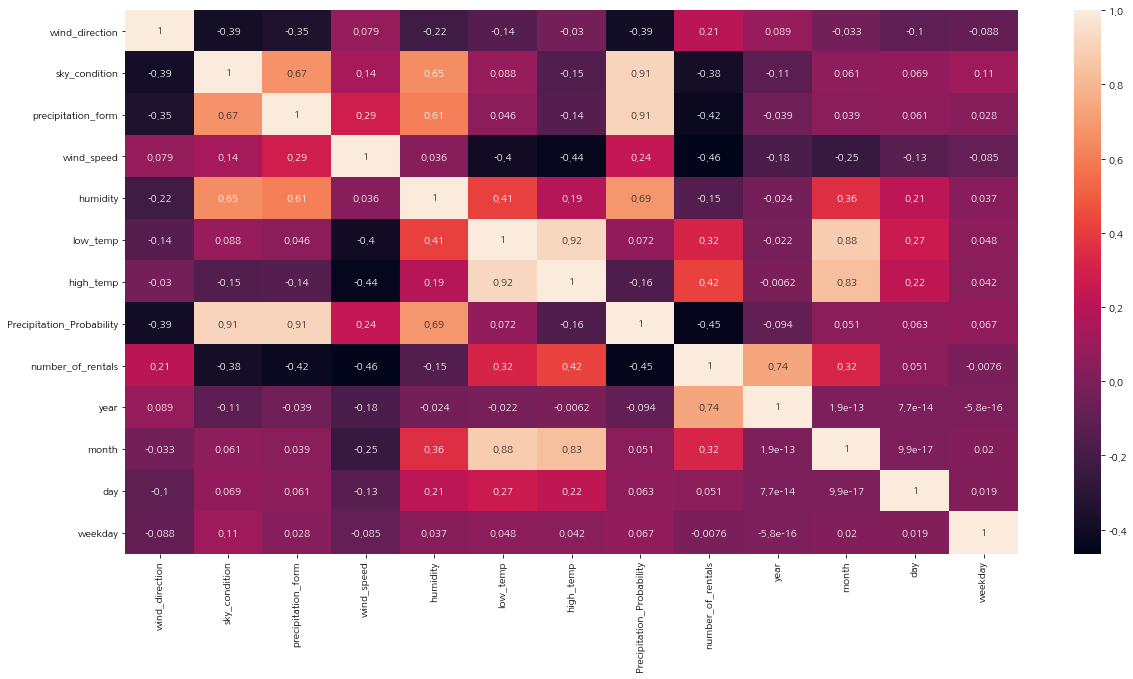

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(train.corr(), annot = True)

Text(0.5, 1.0, '날씨별 대여량')

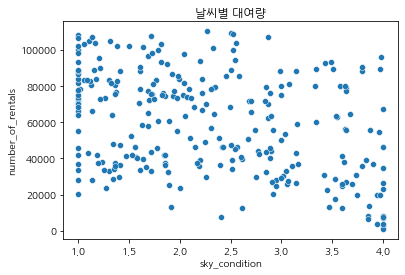

In [12]:
sns.scatterplot(data=train, x='sky_condition', y='number_of_rentals')
plt.title("날씨별 대여량")

날씨에 따른 대여량을 보면 맑음에 많은 대여량을 확인 할 수 있다.

Text(0.5, 1.0, '강수 형태에 따른 대여량')

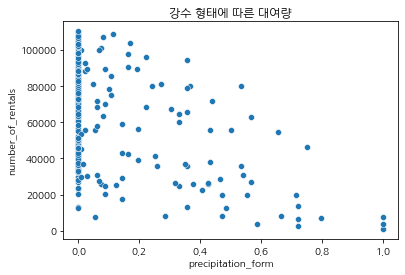

In [13]:
sns.scatterplot(data=train, x='precipitation_form', y='number_of_rentals',)
plt.title("강수 형태에 따른 대여량")

강수 형태에 따른 대여량을 보면 비가 안올때 자전거 대여량이 당연히 많이 모여있음을 알 수 있다.

Text(0.5, 1.0, '강수 확률에 따른 대여랑')

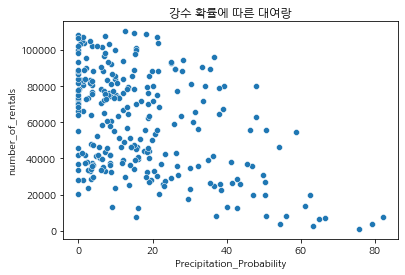

In [14]:
sns.scatterplot(data=train, x='Precipitation_Probability', y='number_of_rentals',)
plt.title("강수 확률에 따른 대여랑")

강수 확률에 따른 대여량 역시 확률이 낮은 쪽에 대여량이 많이 몰려 있는것을 확인 할 수 있다.

Text(0.5, 1.0, '강수 확률에 따른 대여랑')

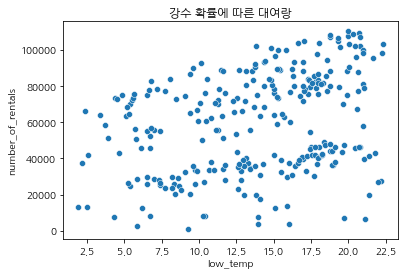

In [15]:
sns.scatterplot(data=train, x='low_temp', y='number_of_rentals',)
plt.title("강수 확률에 따른 대여랑")

Text(0.5, 1.0, '강수 확률에 따른 대여랑')

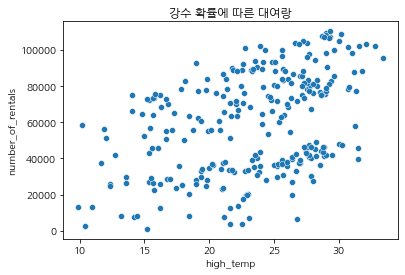

In [16]:
sns.scatterplot(data=train, x='high_temp', y='number_of_rentals',)
plt.title("강수 확률에 따른 대여랑")

## 변수 및 모델 정의
우리의 목적은 주어진 날시 데이터를 이용해 따릉이 대여량을 예측하는 것입니다.<br>
날시 데이터가 X, 따릉이 대여 수가 y가 되야 한다.

In [17]:
X = train.drop(['date_time', 'number_of_rentals'], axis=1)
y = train.number_of_rentals

In [18]:
X

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,weekday
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,6
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,0
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,1
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,2
4,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2018,4,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...
268,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,2020,6,26,4
269,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,2020,6,27,5
270,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,2020,6,28,6
271,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,2020,6,29,0


oringinal model성능 확인

In [33]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [27]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y) 

LinearRegression()

In [28]:
y_hat = model.predict(X)

In [34]:
score = NMAE(y, y_hat)

print(f'모델 NMAE:{nmae}')

모델 NMAE:0.321881080251062


오차율이 32%정도로 나왔다.

## 1. Feature Engineering by human
### 온도 정보 추가